In [1]:
!pip install missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
import missingno as missno
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import auc, roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
train = pd.read_csv('cs-training.csv')
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
test = pd.read_csv('cs-test.csv')
test = test.drop('SeriousDlqin2yrs', axis=1)
test.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
test.describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [6]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (150000, 12)
test shape (101503, 11)


In [7]:
#dropping non-contributing variable
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


Text(0.5, 1.0, 'Missing values')

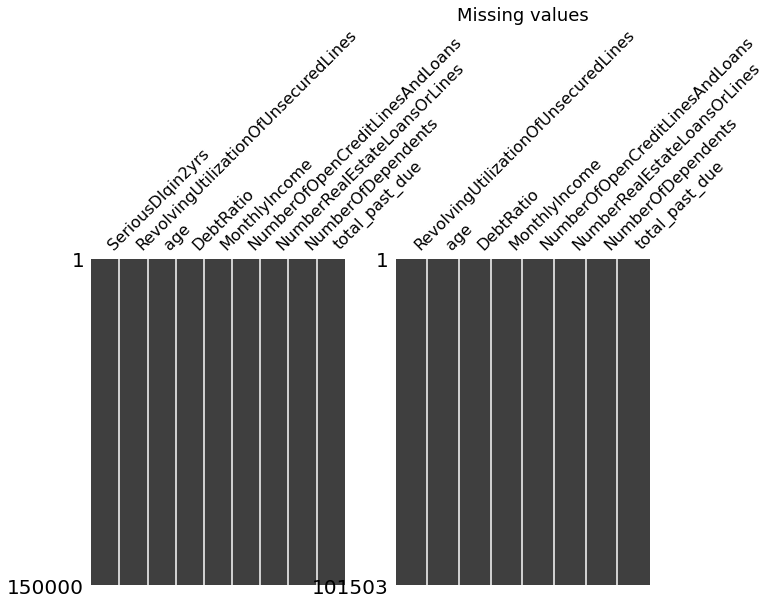

In [68]:
#plotting missing values
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
missno.matrix(train, ax = ax[0])
missno.matrix(test, ax = ax[1])
plt.title('Missing values', size=18)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of NumberOfDependents')

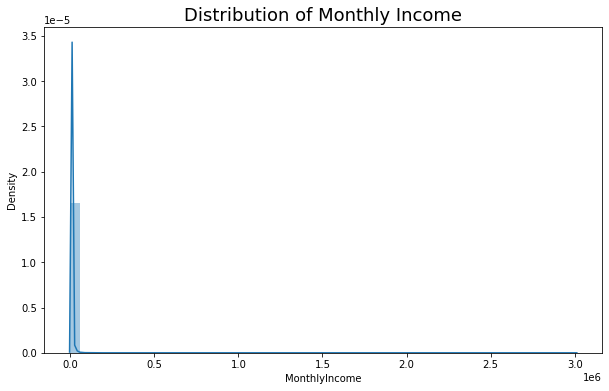

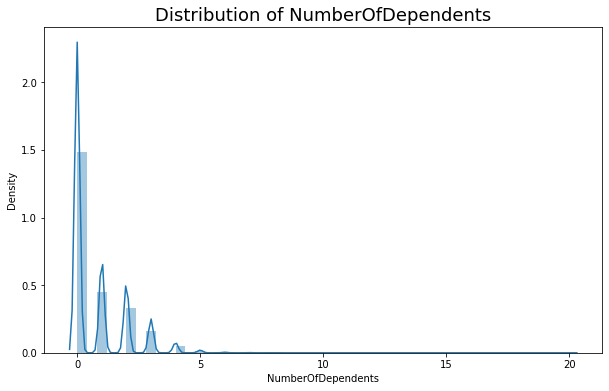

In [9]:
#checking distribution of the features with missing values
plt.figure(figsize=(10, 6))
sns.distplot(train['MonthlyIncome'])
plt.title('Distribution of Monthly Income', size=18)
plt.figure(figsize=(10, 6))
sns.distplot(train['NumberOfDependents'])
plt.title('Distribution of NumberOfDependents', size=18)

In [10]:
#filling missing values withmedian as the distribution is not normal
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(train['MonthlyIncome'].median())
test['MonthlyIncome'] = test['MonthlyIncome'].fillna(test['MonthlyIncome'].median())

train['NumberOfDependents'] = train['NumberOfDependents'].fillna(train['NumberOfDependents'].median())
test['NumberOfDependents'] = test['NumberOfDependents'].fillna(test['NumberOfDependents'].median())

In [11]:
#checking variance with 10% threshold
var_thr = VarianceThreshold(threshold = 0.1) #Removing both constant and quasi-constant
var_thr.fit(train)
dict(zip(train.columns, var_thr.get_support()))

{'SeriousDlqin2yrs': False,
 'RevolvingUtilizationOfUnsecuredLines': True,
 'age': True,
 'NumberOfTime30-59DaysPastDueNotWorse': True,
 'DebtRatio': True,
 'MonthlyIncome': True,
 'NumberOfOpenCreditLinesAndLoans': True,
 'NumberOfTimes90DaysLate': True,
 'NumberRealEstateLoansOrLines': True,
 'NumberOfTime60-89DaysPastDueNotWorse': True,
 'NumberOfDependents': True}

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Features's correlation with Target Feature
SeriousDlqin2yrs 1.0
RevolvingUtilizationOfUnsecuredLines 0.19718160512818844
age -0.09644051844401222
NumberOfTime30-59DaysPastDueNotWorse 0.2522709715697707
DebtRatio 0.0168236921881525
MonthlyIncome -0.051270515196827064
NumberOfOpenCreditLinesAndLoans -0.03246025235750907
NumberOfTimes90DaysLate 0.3396965173417035
NumberRealEstateLoansOrLines -0.03169693388388846
NumberOfTime60-89DaysPastDueNotWorse 0.2756871735837887
NumberOfDependents 0.04408369395260646


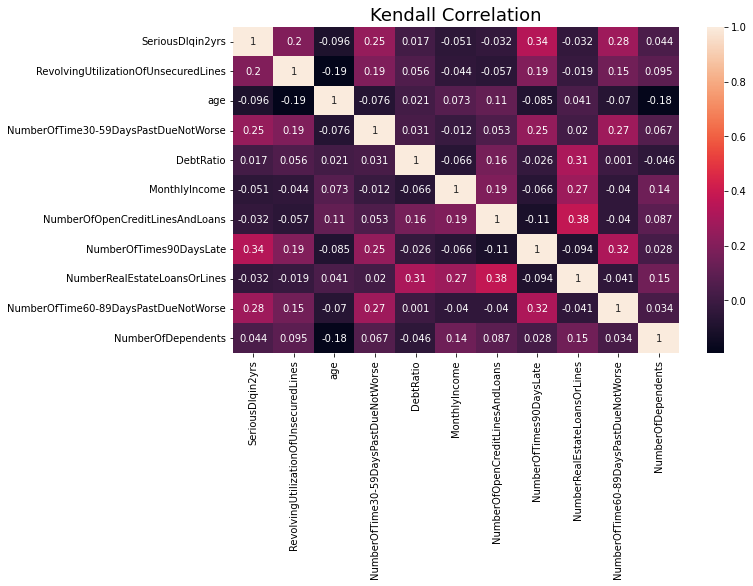

In [12]:
#kendall correlation with target variable
correlation = train.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)

print('Features\'s correlation with Target Feature')
for indx, cor in enumerate(correlation['SeriousDlqin2yrs']):
    print(correlation.index[indx], cor)

Text(0.5, 1.0, 'Pearson Correlation')

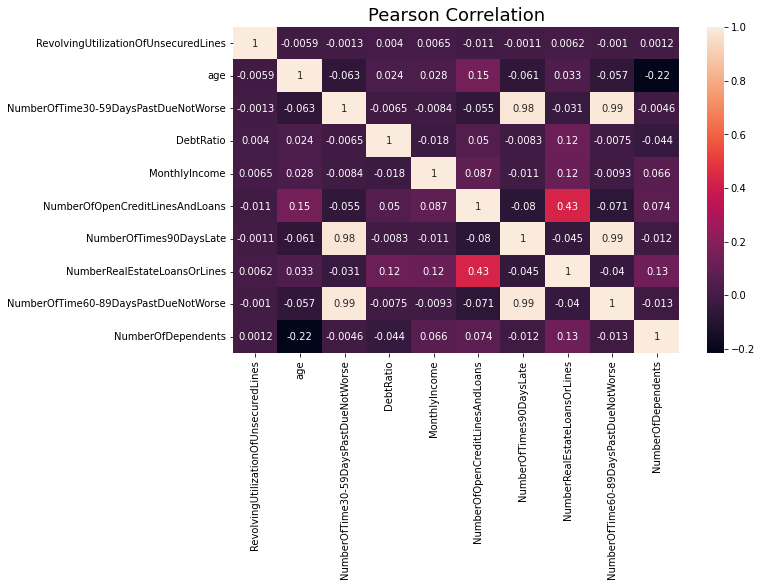

In [13]:
#checking correlation 
temp = train.drop('SeriousDlqin2yrs', axis=1)
correlation = temp.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Pearson Correlation', size=18)

In [14]:
#computing multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = temp.columns
vif_data["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(len(temp.columns))]
print(vif_data)

                                feature        VIF
0  RevolvingUtilizationOfUnsecuredLines   1.000777
1                                   age   3.638439
2  NumberOfTime30-59DaysPastDueNotWorse  41.173243
3                             DebtRatio   1.049552
4                         MonthlyIncome   1.269632
5       NumberOfOpenCreditLinesAndLoans   4.570548
6               NumberOfTimes90DaysLate  73.196237
7          NumberRealEstateLoansOrLines   2.304678
8  NumberOfTime60-89DaysPastDueNotWorse  91.181441
9                    NumberOfDependents   1.403443


In [15]:
#resolving multicollinearity
train['total_past_due'] = train['NumberOfTime30-59DaysPastDueNotWorse'] + (2 * train['NumberOfTime60-89DaysPastDueNotWorse']) + (3*train['NumberOfTimes90DaysLate'])
test['total_past_due'] = test['NumberOfTime30-59DaysPastDueNotWorse'] + (2 * test['NumberOfTime60-89DaysPastDueNotWorse']) + (3*test['NumberOfTimes90DaysLate'])

train.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1, inplace=True)
test.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1, inplace=True)

In [16]:
# train_temp['total_loan'] = train_temp['NumberOfOpenCreditLinesAndLoans'] + train_temp['NumberRealEstateLoansOrLines']
# test_temp['total_loan'] = test_temp['NumberOfOpenCreditLinesAndLoans'] + test_temp['NumberRealEstateLoansOrLines']

# train_temp.drop(['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'], axis=1, inplace=True)
# test_temp.drop(['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'], axis=1, inplace=True)

# train['debt'] = train['DebtRatio'] + train['NumberOfDependents']
# test['debt'] =  test['DebtRatio'] + test['NumberOfDependents']

# train.drop(['DebtRatio', 'NumberOfDependents'], axis=1, inplace=True)
# test.drop(['DebtRatio', 'NumberOfDependents'], axis=1, inplace=True)

# train['NetIncome'] = train['MonthlyIncome'] / train['NumberOfDependents']
# test['NetIncome'] = test['MonthlyIncome'] / test['NumberOfDependents']
# train.drop(['MonthlyIncome', 'NumberOfDependents'], axis=1, inplace=True)
# test.drop(['MonthlyIncome', 'NumberOfDependents'], axis=1, inplace=True)



In [53]:
#Kruskal Wallis Statistical Test 
x = train.drop('SeriousDlqin2yrs', axis=1)
y = train['SeriousDlqin2yrs']

for col in x.columns:
    group1 = train[col][y == 1]
    group2 = train[col][y == 0]
    print(col)
    if stats.kruskal(group1, group2).pvalue > 0.05:
      print('Means of all groups are equal. Remove Feature.')
    else:
      print('At least one mean of the groups are different.')

RevolvingUtilizationOfUnsecuredLines
At least one mean of the groups are different.
age
At least one mean of the groups are different.
DebtRatio
At least one mean of the groups are different.
MonthlyIncome
At least one mean of the groups are different.
NumberOfOpenCreditLinesAndLoans
At least one mean of the groups are different.
NumberRealEstateLoansOrLines
At least one mean of the groups are different.
NumberOfDependents
At least one mean of the groups are different.
total_past_due
At least one mean of the groups are different.


In [71]:
train_temp = train.copy()
train_temp['total_loan'] = train_temp['NumberOfOpenCreditLinesAndLoans'] + train_temp['NumberRealEstateLoansOrLines']
train_temp['debt'] = train_temp['DebtRatio'] * train_temp['MonthlyIncome']

train_temp.drop(['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'DebtRatio', 'MonthlyIncome'], axis=1, inplace=True)

x = train_temp.drop('SeriousDlqin2yrs', axis=1)
y = train_temp['SeriousDlqin2yrs']


print('Kruskal Wallis Test')
for col in x.columns:
    group1 = train_temp[col][y == 1]
    group2 = train_temp[col][y == 0]
    pvalue = stats.kruskal(group1, group2).pvalue
    print(col, pvalue)
    if pvalue > 0.05:
      print('Means of all groups are equal. Remove Feature.')
    else:
      print('At least one mean of the groups are different.')

Kruskal Wallis Test
RevolvingUtilizationOfUnsecuredLines 0.0
At least one mean of the groups are different.
age 0.0
At least one mean of the groups are different.
NumberOfDependents 9.524071746532372e-74
At least one mean of the groups are different.
total_past_due 0.0
At least one mean of the groups are different.
total_loan 3.182535329638526e-53
At least one mean of the groups are different.
debt 0.04597404853523696
At least one mean of the groups are different.


In [67]:
import statsmodels.formula.api as smf
x = train.drop('SeriousDlqin2yrs', axis=1)
y = train['SeriousDlqin2yrs']
print('+'.join(train.columns))
# Load the data
model = smf.ols(formula='SeriousDlqin2yrs ~ RevolvingUtilizationOfUnsecuredLines+age+DebtRatio+MonthlyIncome+NumberOfOpenCreditLinesAndLoans+NumberRealEstateLoansOrLines+NumberOfDependents+total_past_due', data=train)
results = model.fit()

# Print the summary
print(results.summary())

SeriousDlqin2yrs+RevolvingUtilizationOfUnsecuredLines+age+DebtRatio+MonthlyIncome+NumberOfOpenCreditLinesAndLoans+NumberRealEstateLoansOrLines+NumberOfDependents+total_past_due
                            OLS Regression Results                            
Dep. Variable:       SeriousDlqin2yrs   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     495.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:07:39   Log-Likelihood:                -2786.7
No. Observations:              150000   AIC:                             5591.
Df Residuals:                  149991   BIC:                             5681.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 

# Total Past Due

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

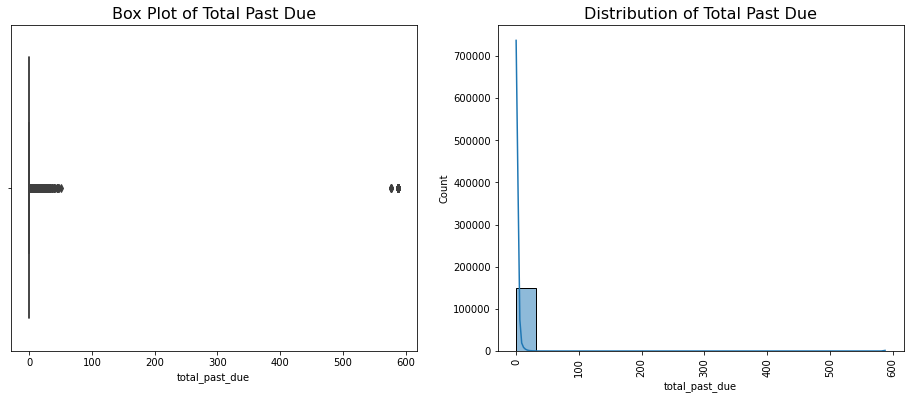

In [18]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(train['total_past_due'], ax = axes[0])
axes[0].set_title('Box Plot of Total Past Due', size=16)
sns.histplot(train['total_past_due'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total Past Due', size=16)
plt.xticks(rotation=90)

# NumberOfOpenCreditLinesAndLoans

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

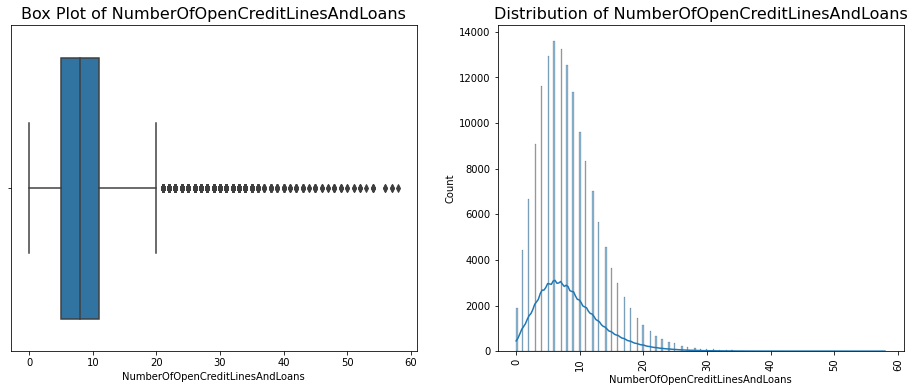

In [19]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(train['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfOpenCreditLinesAndLoans', size=16)
sns.histplot(train['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberOfOpenCreditLinesAndLoans', size=16)
plt.xticks(rotation=90)

# NumberOfDependents

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of NumberOfDependents')

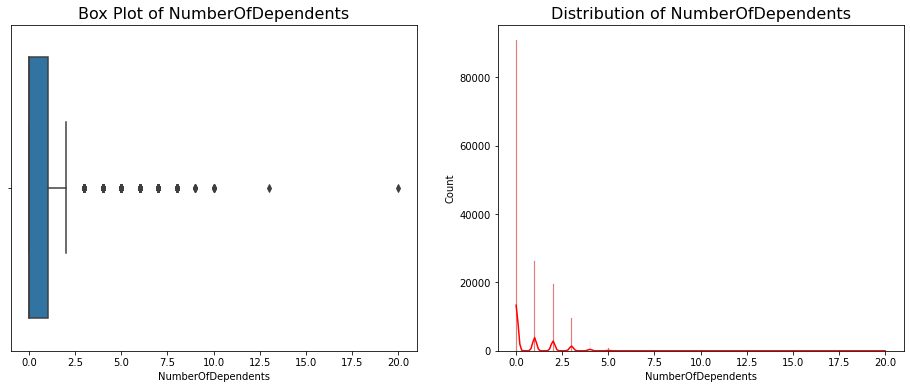

In [20]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(train['NumberOfDependents'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfDependents', size=16)
sns.histplot(train['NumberOfDependents'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of NumberOfDependents', size=16)

# Age

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


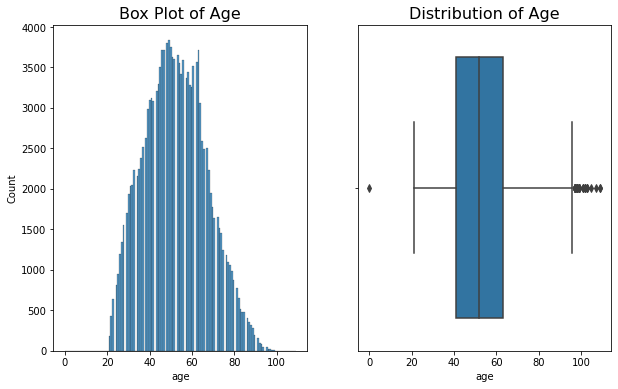

In [21]:
fig, axes = plt.subplots(1,2,figsize = (10, 6))
axes[0].set_title('Box Plot of Age', size=16)
sns.histplot(train['age'], ax=axes[0])
axes[1].set_title('Distribution of Age', size=16)
sns.boxplot(train['age'], ax = axes[1])

In [22]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'total_past_due'],
      dtype='object')

# Credit Line and Loans

Text(0.5, 1.0, 'Scatter Plot over Target Feature')

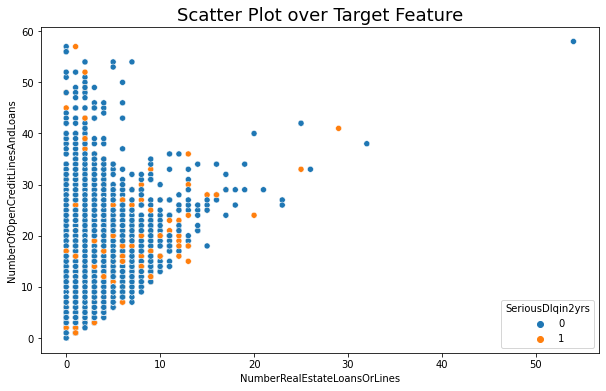

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'NumberRealEstateLoansOrLines', y = 'NumberOfOpenCreditLinesAndLoans', hue = 'SeriousDlqin2yrs', data=train)
plt.title('Scatter Plot over Target Feature', size=18)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of NumberRealEstateLoansOrLines')

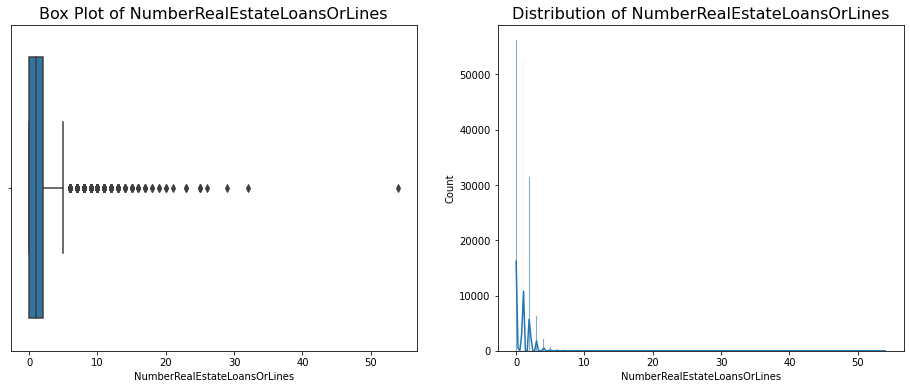

In [24]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(train['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot of NumberRealEstateLoansOrLines', size=16)
sns.histplot(train['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberRealEstateLoansOrLines', size=16)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of NumberOfOpenCreditLinesAndLoans')

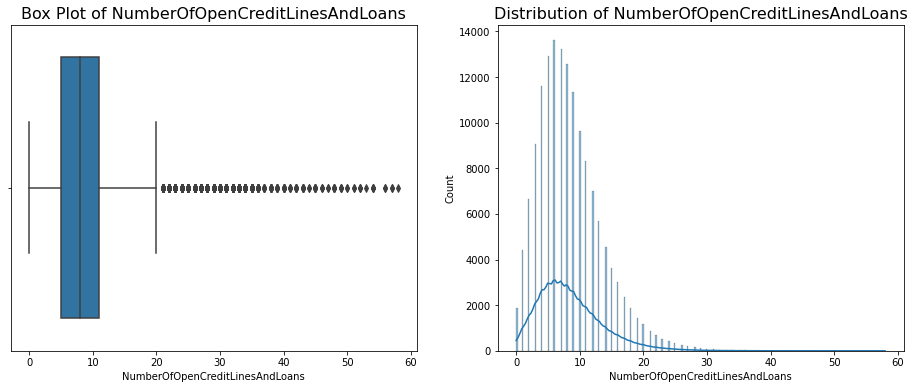

In [25]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(train['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfOpenCreditLinesAndLoans', size=16)
sns.histplot(train['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberOfOpenCreditLinesAndLoans', size=16)

# Target Variable

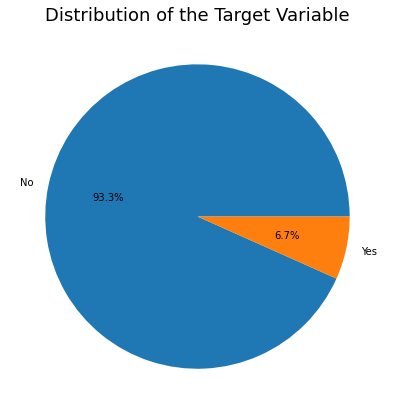

In [26]:
count = train['SeriousDlqin2yrs'].value_counts() 
fig = plt.figure(figsize =(10, 7))
plt.pie(count, autopct = '%1.1f%%', labels = ['No', 'Yes'])
plt.title('Distribution of the Target Variable', size=18)
plt.show()

# Data Modelling

In [27]:
#train test split and oversampling data
x = train.drop('SeriousDlqin2yrs', axis=1)
y = train['SeriousDlqin2yrs']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.1, stratify=y, random_state=1234)

In [28]:
#stratified cross validation
base_model = GradientBoostingClassifier(n_estimators=250)
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(base_model, xtrain, ytrain, scoring = 'roc_auc', cv=skf) 
scores

array([0.8713305 , 0.86847422, 0.86082184, 0.85617803, 0.86724932,
       0.86410022, 0.86973934, 0.86005193, 0.86543268, 0.86888799])

In [29]:
ros = RandomOverSampler(random_state=21)
xtrain, ytrain = ros.fit_resample(xtrain, ytrain)

In [30]:
#base model

base_model.fit(xtrain, ytrain)
ypred = base_model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label = 1)
roc_auc = auc(fpr, tpr)


result = base_model.predict_proba(test)[:,1]
sample = pd.read_csv('sampleEntry.csv')
sample['Probability'] = result
sample.to_csv('result.csv', index=False)

Feature Importance


Text(0.5, 1.0, 'Feature Importance')

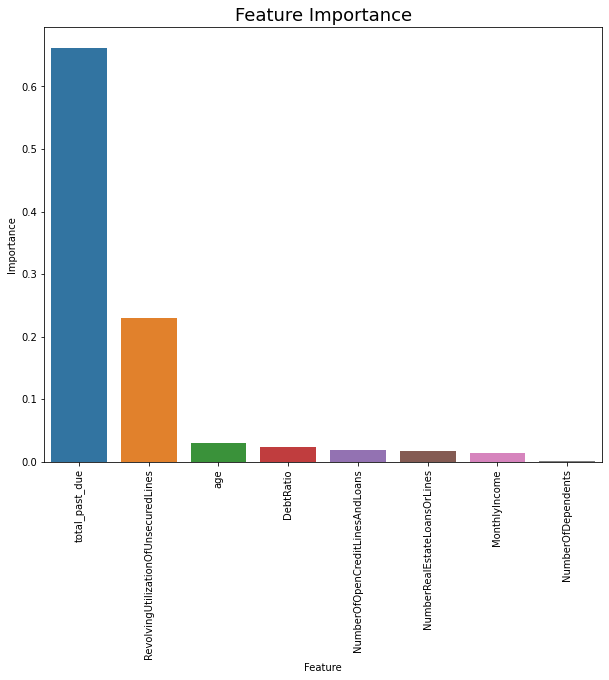

In [31]:
print('Feature Importance')
feature_importance = list(zip(xtrain.columns, base_model.feature_importances_))
feature_importance = pd.DataFrame(feature_importance, columns = ['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x = 'Feature', y ='Importance', data=feature_importance)
plt.xticks(rotation = 90)
plt.title('Feature Importance', size=18)

In [32]:
# import joblib, sys
# sys.modules['sklearn.externals.joblib'] = joblib

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# sfs1 = sfs(base_model,
#            k_features=7,
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='roc_auc',
#            cv=3)

# # Perform SFFS
# sfs1 = sfs1.fit(xtrain, ytrain)

# xtrain.iloc[:, list(sfs1.k_feature_idx_)]

In [33]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# x = train.drop('SeriousDlqin2yrs', axis=1)
# y = train['SeriousDlqin2yrs']

# scaler = MinMaxScaler()
# train[['MonthlyIncome', 'age']] = scaler.fit_transform(train[['MonthlyIncome', 'age']])
#train['Age'] = scaler.fit_transform(train['Age'])

# test[['MonthlyIncome', 'age']] = scaler.fit_transform(test[['MonthlyIncome', 'age']])
#test['Age'] = scaler.fit_transform(test['Age'])
#test = scaler.transform(test)

# pca = PCA(n_components=8)
# x = pca.fit_transform(x)
# test_pca = pca.transform(test)

In [34]:
#hyperparameter Tuning
def compute_model(model_obj, params):
    grid_model = GridSearchCV(model_obj, params, cv=None)
    grid_model.fit(xtrain, ytrain)
    ypred_train = grid_model.best_estimator_.predict_proba(xtrain)[:,1]
    ypred = grid_model.best_estimator_.predict_proba(xtest)[:,1]

    fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label = 1)
    score = auc(fpr, tpr)

    result = {'auc':score}
    return result, grid_model.best_estimator_

In [35]:
#LogisticRegression
lr_model = LogisticRegression()
lr_params = {}
model_name = 'Logistic Regression'
result, best_estimator = compute_model(lr_model, lr_params)

model_results = dict()
model_results[model_name] = [result, best_estimator]
print(model_name, result)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression {'auc': 0.8211464769797202}


In [36]:
#XGBoost
xg_param_grid = {} #'learning_rate': [0.1, 0.05], 'n_estimators': [150, 200], 'max_depth': [3, 4]
xg_model = XGBClassifier()
model_name = 'XGBoost' 
result, best_estimator = compute_model(xg_model, xg_param_grid)

model_results[model_name] = [result, best_estimator]
print(model_name, result)

XGBoost {'auc': 0.8725693320837657}


In [37]:
#GradientBoost
gb_param_grid = {} #{'n_estimators': [200, 250], 'max_depth': [4, 5], 'learning_rate': [0.1, 0.2, 0.05]}
gb_model = GradientBoostingClassifier()
model_name = 'GradientBoosting'
result, best_estimator = compute_model(gb_model, gb_param_grid)

model_results[model_name] = [result, best_estimator]
print(model_name, result)

GradientBoosting {'auc': 0.8727814912054577}


In [38]:
#Random Forest
rf_param_grid = {} #{'n_estimators': [100, 150, 200, 250, 280], 'max_depth': [3, 4, 5]}
rf_model = RandomForestClassifier()
model_name = 'RandomForest'
result, best_estimator = compute_model(rf_model, rf_param_grid)

model_results[model_name] = [result, best_estimator]
print(model_name, result)

RandomForest {'auc': 0.8453168037503549}


In [39]:
#Adaboost
ab_param_grid = {} #{'learning_rate':[0.1, 0.2, 0.5, 0.8, 0.05], 'n_estimators': [100, 150, 200, 250, 280]}
model_name = 'AdaBoost'
ab_model = AdaBoostClassifier()
result, best_estimator = compute_model(ab_model, ab_param_grid)

model_results[model_name] = [result, best_estimator]
print(model_name, result)

AdaBoost {'auc': 0.8668418193301782}


In [40]:
#Decision Tree
dt_param_grid =  {'max_depth': [3, 4, 5, 6, 7]}
model_name = 'DecisionTree'
dt_model = DecisionTreeClassifier()
result, best_estimator = compute_model(dt_model, dt_param_grid)

model_results[model_name] = [result, best_estimator]
print(model_name, result)

DecisionTree {'auc': 0.8599960638196862}


In [41]:
#SVM
# sv_param_grid = {} #{'C': [0.1, 0.3, 0.5, 0.7, 1], 'kernel': ['linear', 'rbf', 'poly']}
# model_name = 'SVM'
# sv_model = SVC()
# result, best_estimator = compute_model(sv_model, sv_param_grid)

# model_results[model_name] = [result, best_estimator]
# print(model_name, result)

In [42]:
results = [[model_name, results[0]['auc'], results[1]] for model_name, results in model_results.items()]
results = pd.DataFrame(results, columns = ['model_name', 'auc', 'best_model'])
results

,model_name,auc,best_model
0,Logistic Regression,0.821146,LogisticRegression()
1,XGBoost,0.872569,XGBClassifier()
2,GradientBoosting,0.872781,([DecisionTreeRegressor(criterion='friedman_ms...
3,RandomForest,0.845317,"(DecisionTreeClassifier(max_features='auto', r..."
4,AdaBoost,0.866842,"(DecisionTreeClassifier(max_depth=1, random_st..."
5,DecisionTree,0.859996,DecisionTreeClassifier(max_depth=7)


Text(0.5, 1.0, 'Comparison of Model Performance')

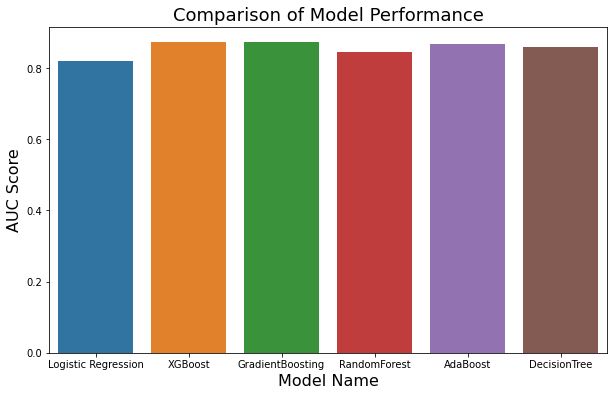

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'model_name', y = 'auc', data = results)
plt.xlabel('Model Name', size=16)
plt.ylabel('AUC Score', size=16)
plt.title('Comparison of Model Performance', size=18)

In [44]:
gb = results['best_model'][2]
xg = results['best_model'][1]
ad = results['best_model'][3]

all_models = (('gb', gb), ('xg', xg))

model = StackingClassifier(estimators = all_models, final_estimator = gb)
model.fit(xtrain, ytrain)
ypred_train = model.predict_proba(xtrain)[:,1]
ypred = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label = 1)
score = auc(fpr, tpr)
score

0.871544151570437

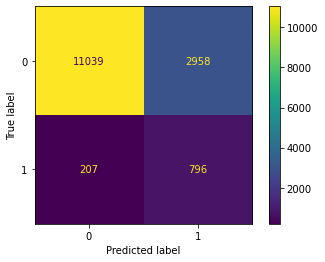

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
gb = results['best_model'][2]
ypred_classes = gb.predict(xtest)
cm = confusion_matrix(ytest, ypred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot()
plt.show()

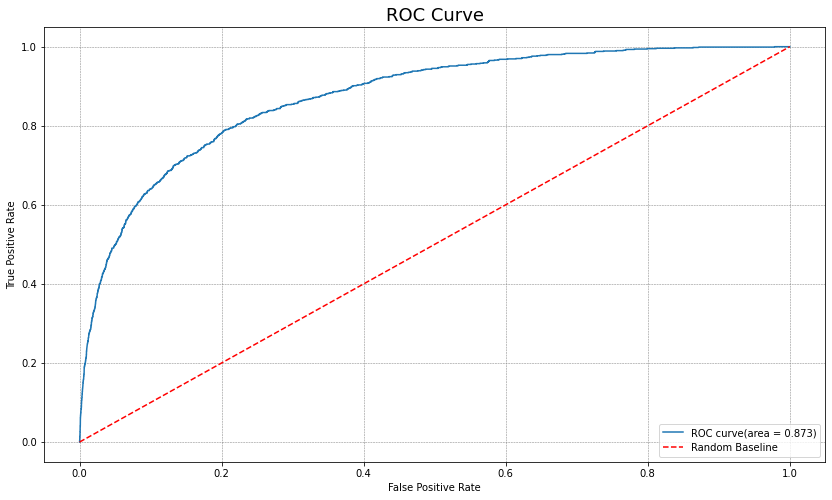

In [46]:
ypred = gb.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")


In [47]:
best_estimator = results['best_model'][results['auc'] == max(results['auc'])]
best_estimator = best_estimator.reset_index(drop=True)[0]
result = best_estimator.predict_proba(test)[:, 1]
sample = pd.read_csv('sampleEntry.csv')
sample['Probability'] = result
sample.to_csv('submit.csv', index=False)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['AUC'])
model.fit(xtrain, ytrain,epochs=50, batch_size=50, verbose=1)

Epoch 1/50
5040/5040 [==============================] - 20s 4ms/step - loss: 3.6578 - auc: 0.5238
Epoch 2/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.8207 - auc: 0.5232
Epoch 3/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.7630 - auc: 0.5518
Epoch 4/50
5040/5040 [==============================] - 19s 4ms/step - loss: 0.6661 - auc: 0.6916
Epoch 5/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.5351 - auc: 0.8113
Epoch 6/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.5199 - auc: 0.8206
Epoch 7/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.5150 - auc: 0.8234
Epoch 8/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.5148 - auc: 0.8237
Epoch 9/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.5128 - auc: 0.8257
Epoch 10/50
5040/5040 [==============================] - 17s 3ms/step - loss: 0.5142 - auc: 0.8251
Epoch 11/50
5040/50

In [50]:
ypred = model.predict(xtest)
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label = 1)
print(auc(fpr, tpr))

469/469 [==============================] - 1s 3ms/step
0.8466531889649335
